# Initial relations for N_n using cel

In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.special import ellipe,ellipk
import matplotlib.pyplot as pl
%matplotlib notebook
epsabs = 1e-12
epsrel = 1e-12

Here is the expression for the integral M_n:

In [6]:
def N_n(r, b, n):
    if (1 + r <= b):
        return 0
    elif abs(1 - r) < b and b <= 1 + r:
        k2 = (1 - (b- r) ** 2) / (4*b*r)
        kappa_half = np.arcsin(np.sqrt(k2))
        func = lambda x: np.sqrt(k2-np.sin(x)**2)**n*np.sin(x)**2
        res, err = quad(func,-kappa_half,kappa_half,epsabs=epsabs,epsrel=epsrel)
        return np.sqrt(4*b*r)**n*res
    elif b <= 1 - r:
        k2 = (1 - (b- r) ** 2) / (4*b*r)
        if n == 0:
            return np.pi
        else:
            func = lambda x: np.sqrt(np.abs(1-(b-r)**2-4*b*r*np.sin(x)**2))**n*np.sin(x)**2
            res, err = quad(func,-np.pi/2,np.pi/2,epsabs=epsabs,epsrel=epsrel)
            return res
    elif b <= r - 1:
        return 0
    else:
        raise NotImplementedError("Missing case!")

Generalized complete elliptic integral with p=1:

In [7]:
def cel(kc,a,b):
    func = lambda x: (a*np.cos(x)**2+b*np.sin(x)**2)/np.sqrt(np.cos(x)**2+kc**2*np.sin(x)**2)
    res, error = quad(func,0,0.5*np.pi,epsabs=epsabs,epsrel=epsrel)
    return res

Here's the alternate expression for N_n from n=0 to 3 with cel:

In [11]:
def N_0_to_1(r,b,n):
    if (1 + r <= b):
        return 0
    elif abs(1 - r) < b and b <= 1 + r:
        k2 = (1 - (b- r) ** 2) / (4*b*r)
        kappa_half = np.arcsin(np.sqrt(k2))
        if n == 0:
            return kappa_half - np.sqrt(k2*(1-k2))
        elif n == 1:
            return 2/3*np.sqrt(4*b*r)*k2*(-cel(np.sqrt(1-k2),1,1-k2)+2*cel(np.sqrt(1-k2),1,0))
        else:
          raise NotImplementedError("k2 < 1; n > 1")
    elif b <= 1 - r:
        k2 = (1 - (b- r) ** 2) / (4*b*r)
        if n == 0:
            return 0.5*np.pi
        elif n == 1:
            return 2/3*np.sqrt(1-(r-b)**2)*(2*cel(np.sqrt(1-1/k2),1,1-1/k2)-cel(np.sqrt(1-1/k2),1,0))
        else:
          raise NotImplementedError("k2 > 1; n > 1")
    elif b <= r - 1:
        return 0
    else:
        raise NotImplementedError("Missing case!")

Let's show that the expressions yield the same answer (to within the error of the numerical method) over a large range of $b$ and $r$ values:

<IPython.core.display.Javascript object>


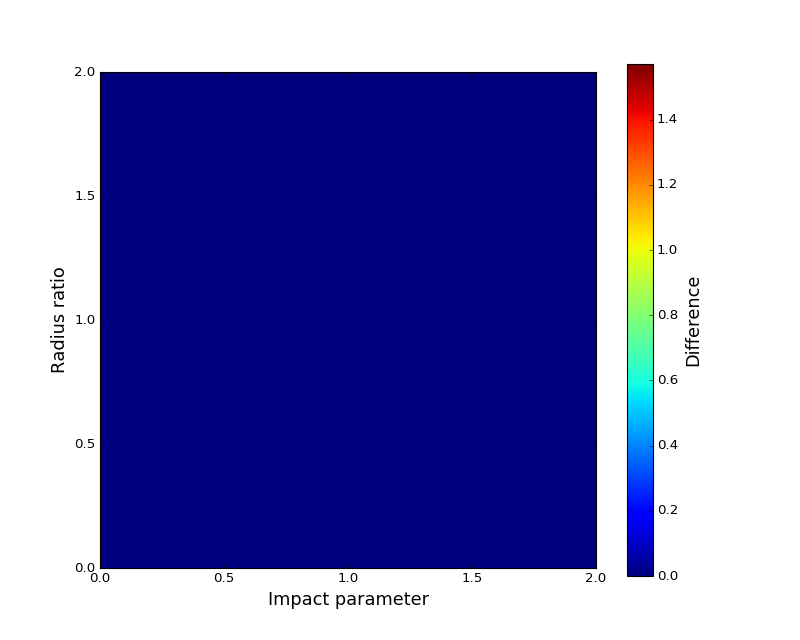

<IPython.core.display.Javascript object>


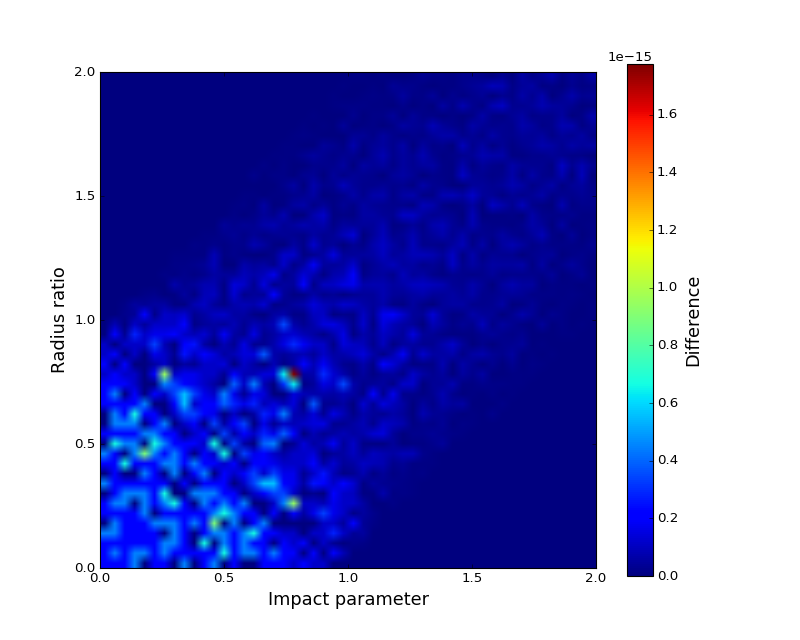

In [14]:
n = 50
barr = np.linspace(1e-4, 2, n)
rarr = np.linspace(1e-4, 2, n)
diff = np.zeros((n, n))
Nu_grid = np.linspace(0,1,2)
# Nu is the order of the integral:
for k, Nu in enumerate(Nu_grid):
    for i, b in enumerate(barr):
        for j, r in enumerate(rarr):
            diff[j, i] = abs(N_n(r, b, Nu) - N_0_to_1(r, b, Nu))
    fig = pl.figure(figsize=(10, 8))
    pl.imshow(diff, origin="lower", extent=(0, 2, 0, 2))
    pl.xlabel("Impact parameter", fontsize=16)
    pl.ylabel("Radius ratio", fontsize=16)
    cb = pl.colorbar()
    cb.ax.set_ylabel("Difference", fontsize=16);

The difference is numerically precise everywhere, indicating that our expression is correct.